In [8]:
from transformers import GPT2LMHeadModel

In [9]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M parameters model.
sd_model = model_hf.state_dict() # returns the tensor state_dict of the model.

for k, v in sd_model.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [10]:
sd_model['transformer.wte.weight'].view(-1)[:50] # token embeddings.

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365, -0.0771, -0.0346, -0.0234, -0.0928,
         0.1336, -0.0661, -0.0502,  0.0464, -0.0710, -0.0907,  0.0428, -0.0883,
         0.0978, -0.1381, -0.1403, -0.1256, -0.3174, -0.1092, -0.0708,  0.0584,
         0.0079, -0.0297,  0.1430,  0.0311, -0.0313,  0.1102,  0.0549, -0.0589,
         0.0356, -0.1533])

In [11]:
sd_model['transformer.wpe.weight'].view(-1)[:50] # positional embeddings.

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042,  0.0135, -0.0363,  0.0193, -0.0259,
         0.0080,  0.0085, -0.0199,  0.0668,  0.0071, -0.0266,  0.0208, -0.0337,
        -0.0083,  0.0099, -0.0274, -0.0991, -0.7525,  0.0236, -0.0305,  0.0775,
         0.0034,  0.0071,  0.0265, -0.0012,  0.1122, -0.0021, -0.0225, -0.0223,
         0.0236,  0.3978])

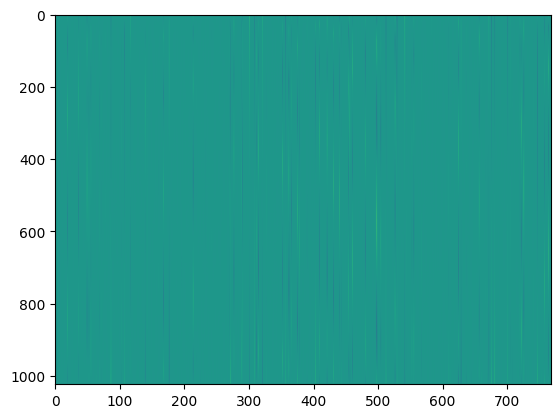

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_model['transformer.wpe.weight'], cmap='viridis', aspect='auto') # PE represents the sinusoidal positional representation. 
plt.show()

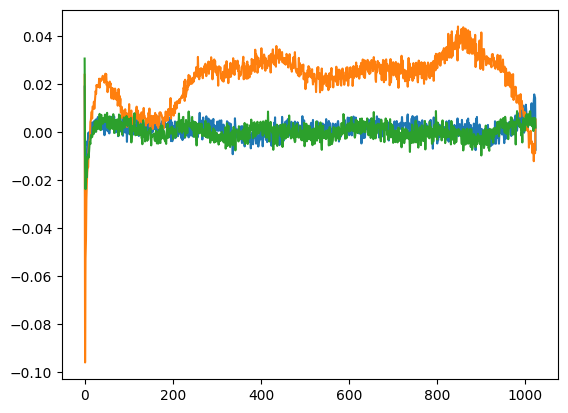

In [13]:
plt.plot(sd_model['transformer.wpe.weight'][:,50])
plt.plot(sd_model['transformer.wpe.weight'][:,250])
plt.plot(sd_model['transformer.wpe.weight'][:,500])

The plot above shows the trained positional embeddings of the GPT-2 model. In original transformer model positional encodings remain constant throughout the training process, while token embeddings are learned during training. But in GPT2 model, the position encodings are also the regular parameters and they are trained from scratch and recover the sinusoidal like structure during the optimization process. The fluctuation of the positional embeddings in the above figure means that the model is not trained completely and the plot stabilizes as the model is trained further.

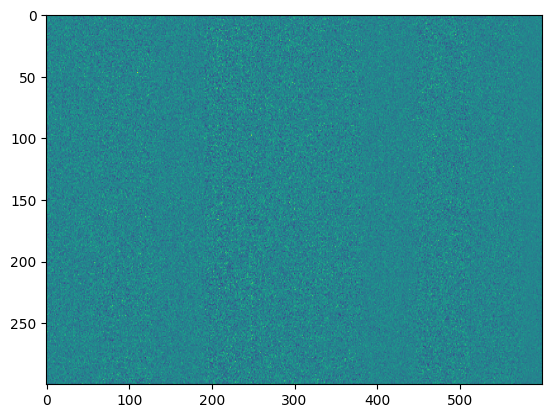

In [14]:
plt.imshow(sd_model['transformer.h.0.attn.c_attn.weight'][:300, :600], cmap='viridis', aspect='auto')

In [15]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [2]:
# getting tiny shakespeare data
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

with open('/home/ubuntu/bin/build-GPT/data/input.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1000 characters.
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [3]:
import tiktoken 
tokenizer = tiktoken.get_encoding("gpt2")
tokens = tokenizer.encode(data)
print(tokens[:30])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13, 198, 198, 5962, 22307, 25, 198]


In [4]:
import torch
tokens_tensors = torch.tensor(tokens[:30 + 1])
x = tokens_tensors[:-1].view(5, 6)
y = tokens_tensors[1:].view(5, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13],
        [  198,   198,  5962, 22307,    25,   198]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198],
        [  198,  5962, 22307,    25,   198,  1639]])


In [20]:
# token embeddings weights.
print(sd_model['transformer.wte.weight'].shape)
print(sd_model['lm_head.weight'].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [21]:
(sd_model['transformer.wte.weight'] == sd_model['lm_head.weight']).all()

tensor(True)

In [22]:
print(sd_model['transformer.wte.weight'].data_ptr())
print(sd_model['lm_head.weight'].data_ptr())

140617855021120
140617855021120


In [5]:
# standard deviation grows inside the residual connection.
import torch 

x = torch.zeros(768)
print(x.std())
N = 100 # number of layers.
for _ in range(N):
    x += N**-0.5 * torch.randn(768)
print(x.std())

tensor(0.)
tensor(1.0153)


In [1]:
import math

def cosine_lr_schedule(max_lr, warmup_steps, max_steps, cur_step):
    """Cosine learning rate schedule with warm-up as mentioned in GPT-3 paper at Appendix B, page 43.
    Code taken from: https://github.com/karpathy/build-nanogpt/blob/master/train_gpt2.py#L354C5-L364C46
    """
    min_lr = max_lr * 0.1  # 10% of max_lr.

    # 1) linear warmup for warmup_iters steps
    if cur_step < warmup_steps:
        return max_lr * (cur_step + 1) / warmup_steps

    # 2) if cur_step > lr_decay_iters, return min learning rate
    if cur_step > max_steps:
        return min_lr

    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (cur_step - warmup_steps) / (max_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (
        1.0 + math.cos(math.pi * decay_ratio)
    )  # coeff starts at 1 and goes to 0

    return min_lr + coeff * (max_lr - min_lr)

cosine_lr_schedule(2, 10, 50, 49) # warmup step.

0.20277439964018484

In [6]:
import torch

# simple MLP model.
net = torch.nn.Sequential(
    torch.nn.Linear(4, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1)
)
torch.random.manual_seed(2024)
x = torch.randn(2, 4)
y = torch.randn(2, 1)
net.zero_grad()
y_hat = net(x)
loss = torch.nn.functional.mse_loss(y_hat, y)
loss.backward()
print(net[0].weight.grad.view(-1)[:5])

tensor([-0.0038,  0.2556, -0.1250,  0.2078, -0.0033])


In [9]:
net.zero_grad()
for i in range(2):
    y_hat = net(x[i])
    loss = torch.nn.functional.mse_loss(y_hat, y[i])
    loss = loss / 2
    loss.backward() 
print(net[0].weight.grad.view(-1)[:5])

tensor([-0.0038,  0.2556, -0.1250,  0.2078, -0.0033])
